In [ ]:
from PIL import Image, ImageFilter
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
im = PIL.Image.open('../../materials/scrape_fashion_2/2006.44.1.png')

In [ ]:
im = im.convert("P")
im = im.convert("P", palette = PIL.Image.ADAPTIVE, colors = 30)

In [ ]:
cv2.imshow()

In [ ]:
pal = pal.colors.get

In [ ]:
pal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
!tree ../..

In [ ]:
import cv2
import numpy as np

# opencv loads the image in BGR, convert it to RGB
img = cv2.cvtColor(cv2.imread('../../materials/scrape_fashion_2/2006.44.1.png'),
                   cv2.COLOR_BGR2RGB)

# load mask and make sure is black&white
_, mask = cv2.threshold(cv2.imread('../../materials/scrape_fashion_2/2006.44.1.png', 0),
                        0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# load background (could be an image too)
bk = np.full(img.shape, 255, dtype=np.uint8)  # white bk, same size and type of image
bk = cv2.rectangle(bk, (0, 0), (int(img.shape[1] / 2), int(img.shape[0] / 2)), 0, -1)  # rectangles
bk = cv2.rectangle(bk, (int(img.shape[1] / 2), int(img.shape[0] / 2)), (img.shape[1], img.shape[0]), 0, -1)

# get masked foreground
fg_masked = cv2.bitwise_and(img, img, mask=mask)

# get masked background, mask must be inverted 
mask = cv2.bitwise_not(mask)
bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

# combine masked foreground and masked background 
final = cv2.bitwise_or(fg_masked, bk_masked)
mask = cv2.bitwise_not(mask)  # revert mask to original

In [ ]:
cv2.imshow('final',final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from colorthief import ColorThief

color_thief = ColorThief('../../materials/scrape_fashion_2/2006.44.1.png')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(color_count=6)

In [ ]:
palette

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

for colour in palette:
    print(colour)

In [ ]:
plt.imshow([202, 199, 197])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.imshow([[ 255]])

In [ ]:

import sys

if sys.version_info < (3, 0):
    from urllib2 import urlopen
else:
    from urllib.request import urlopen

import io

from colorthief import ColorThief


fd = urlopen('http://lokeshdhakar.com/projects/color-thief/img/photo1.jpg')
f = io.BytesIO(fd.read())
color_thief = ColorThief(f)
#print(color_thief.get_color(quality=1))
print(color_thief.get_palette(quality=1))

In [ ]:
color_thief.image

In [ ]:
pal_test = color_thief.get_palette()

In [ ]:
pal_test

In [ ]:
col_test = color_thief.get_color()

In [ ]:
col_test

In [ ]:
img = cv2.imread('/Users/Rabbit/capstone/materials/scrape_fashion_2/2010.98.1.png')

In [ ]:
color_thief.image

In [ ]:
import numpy as np
import cv2

img = cv2.imread('/Users/Rabbit/Downloads/china_test.jpg')
Z = img.reshape((-1, 3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
ret, label, center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
img.reshape()

In [ ]:
center

In [ ]:
res2

In [ ]:
plt.imshow(img)

In [71]:
test_images = ['/Users/Rabbit/Downloads/china_test.jpg', 
               '/Users/Rabbit/Downloads/vilnius_test.jpg', 
               '/Users/Rabbit/Downloads/spices_test.jpg']

In [72]:
loc_fashion_images = ['/Users/Rabbit/capstone/materials/scrape_fashion_2/2003.86.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.44.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.2.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2007.30.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2008.4.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2010.98.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/74.32.4.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/76.64.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/80.1.4.png']

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_color(color_arr):
    return plt.imshow([(color_arr)])

def convert_rgb_to_percent(pal_test):
    for color in pal_test:
        for rgb_val in color:
            color_val.append(rgb_val/255)
        color_arr.append(tuple(color_val))
        color_val.clear()

    return color_arr

def display_palette(img):
    pass

In [139]:
# pic_test = test_images[2]
pic_test = loc_fashion_images[6]

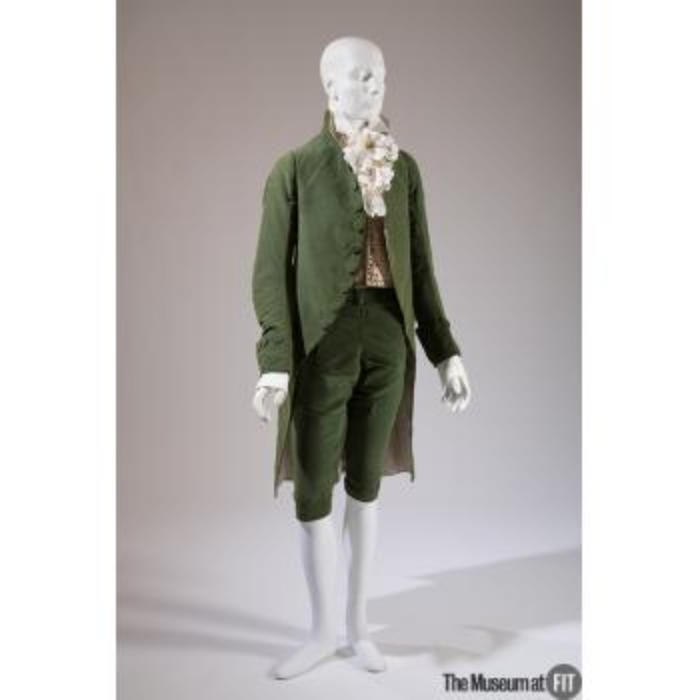

In [140]:
from colorthief import ColorThief
import io

colorthief = ColorThief(pic_test)
colorthief.image

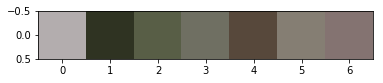

In [141]:
pal_test.clear
pal_test = colorthief.get_palette(color_count=7, quality=1)
pal_test

color_arr.clear
color_arr = convert_rgb_to_percent(pal_test)

display_color(color_arr)

In [142]:
palette_list = []
color_arr = []
color_val = []

In [108]:
color_arr

[(0.4117647058823529, 0.4235294117647059, 0.42745098039215684),
 (0.6274509803921569, 0.4823529411764706, 0.4549019607843137),
 (0.39215686274509803, 0.12549019607843137, 0.13333333333333333),
 (0.8549019607843137, 0.8627450980392157, 0.8627450980392157),
 (0.7529411764705882, 0.44313725490196076, 0.43529411764705883),
 (0.37254901960784315, 0.24705882352941178, 0.14901960784313725),
 (0.1607843137254902, 0.14901960784313725, 0.13725490196078433),
 (0.45098039215686275, 0.3411764705882353, 0.23921568627450981),
 (0.5450980392156862, 0.5803921568627451, 0.5803921568627451),
 (0.43137254901960786, 0.23529411764705882, 0.23137254901960785),
 (0.5450980392156862, 0.5490196078431373, 0.5803921568627451),
 (0.29411764705882354, 0.3176470588235294, 0.3176470588235294),
 (0.6313725490196078, 0.6745098039215687, 0.7058823529411765),
 (0.43529411764705883, 0.4, 0.396078431372549),
 (0.8549019607843137, 0.8627450980392157, 0.8627450980392157),
 (0.7529411764705882, 0.44313725490196076, 0.43529411

In [ ]:
plt.imshow([color_tup_lst])

In [ ]:
plt.imshow([[(124 / 255, 190 / 255, 193 / 255)]])

In [ ]:


for color in pal_test[1:2]:
    color_lst = []
    for rgb in color:
        color_lst.append(rgb/255)

In [ ]:
for color in color_lst:
    color_tup = tuple(color_lst)
plt.imshow([[color_tup]])

In [ ]:
import colorgram

img = ('/Users/Rabbit/capstone/materials/scrape_fashion_2/76.64.1.png')

In [ ]:
colors = colorgram.extract(img, 6)

In [ ]:
colors